In [1]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

In [6]:
asset_folder = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..', 'HeroysundBridge-ML-Assets'))
print("Path to asset folder:", asset_folder)

file_path = os.path.join(asset_folder, 'HeroysundBridge-ML-Assets', '','') NEED TO BE FILLED IN

df = pd.read_csv(file_path, delimiter=';', encoding='utf-8', on_bad_lines='skip')
display(df)

      Tid(norsk normaltid) Gjennomsnittlig globalstråling (1 t)  \
0         01.09.2020 01:00                                    0   
1         01.09.2020 02:00                                    0   
2         01.09.2020 03:00                                    0   
3         01.09.2020 04:00                                    0   
4         01.09.2020 05:00                                  1,1   
...                    ...                                  ...   
29203     03.11.2023 21:00                                    -   
29204     03.11.2023 22:00                                    -   
29205     03.11.2023 23:00                                    -   
29206     04.11.2023 00:00                                    -   
29207     11.12.2023 13:00                                    -   

       Solskinnstid (1 t) Middel av middelvind (1 t) Nedbør (1 t)  \
0                       0                        1,9            0   
1                       0                        1,4     

In [7]:
def convert_date_to_utc(date_str):
    try:
        # Convert the date string to UTC format (YYYYMMDDHH)
        return pd.to_datetime(date_str, format='%d.%m.%Y %H:%M').strftime('%Y%m%d%H')
    except:
        return None  # Returns None if the conversion fails

      Tid(norsk normaltid) Gjennomsnittlig globalstråling (1 t)  \
0               2020090101                                    0   
1               2020090102                                    0   
2               2020090103                                    0   
3               2020090104                                    0   
4               2020090105                                  1,1   
...                    ...                                  ...   
29203           2023110321                                    -   
29204           2023110322                                    -   
29205           2023110323                                    -   
29206           2023110400                                    -   
29207           2023121113                                    -   

       Solskinnstid (1 t) Middel av middelvind (1 t) Nedbør (1 t)  \
0                       0                        1,9            0   
1                       0                        1,4     

In [10]:
# Replace "-" with 0 and "," with "." in the DataFrame
df = df.replace('-', '0').replace(',', '.', regex=True)

# Convert all columns except 'Tid(norsk normaltid)' to float64
for col in df.columns:
    if col != 'Tid(norsk normaltid)':
        df[col] = df[col].astype(float)

# Print the DataFrame to check the result
print(df)

# Function to check the data type of each column
def check_column_types(dataframe):
    for column in dataframe.columns:
        dtype = dataframe[column].dtype
        if dtype == 'float64':
            print(f"Column '{column}' is of type: float")
        elif dtype == 'object':
            # 'object' dtype usually means strings in pandas
            print(f"Column '{column}' is of type: string")
        else:
            # For any other data type
            print(f"Column '{column}' is of type: {dtype}")

# Check the data types of the columns
check_column_types(df)


      Tid(norsk normaltid)  Gjennomsnittlig globalstråling (1 t)  \
0               2020090101                                   0.0   
1               2020090102                                   0.0   
2               2020090103                                   0.0   
3               2020090104                                   0.0   
4               2020090105                                   1.1   
...                    ...                                   ...   
29203           2023110321                                   0.0   
29204           2023110322                                   0.0   
29205           2023110323                                   0.0   
29206           2023110400                                   0.0   
29207           2023121113                                   0.0   

       Solskinnstid (1 t)  Middel av middelvind (1 t)  Nedbør (1 t)  \
0                     0.0                         1.9           0.0   
1                     0.0                

In [11]:


# Convert the pandas DataFrame to a PyArrow Table
table = pa.Table.from_pandas(df)

# Specify the file path and name for the Parquet file
parquet_file_path = r'C:\Users\200408\OneDrive - Betonmast\Skrivebord\NTNU\Prosjektoppgave\Klimadata\output_file.parquet'

# Write the Table to a Parquet file
pq.write_table(table, parquet_file_path)

print(f"DataFrame has been saved as a Parquet file at {parquet_file_path}")


DataFrame has been saved as a Parquet file at C:\Users\200408\OneDrive - Betonmast\Skrivebord\NTNU\Prosjektoppgave\Klimadata\output_file.parquet


      Tid(norsk normaltid)  Gjennomsnittlig globalstråling (1 t)  \
0               2020090101                                   0.0   
1               2020090102                                   0.0   
2               2020090103                                   0.0   
3               2020090104                                   0.0   
4               2020090105                                   1.1   
...                    ...                                   ...   
29203           2023110321                                   0.0   
29204           2023110322                                   0.0   
29205           2023110323                                   0.0   
29206           2023110400                                   0.0   
29207           2023121113                                   0.0   

       Solskinnstid (1 t)  Middel av middelvind (1 t)  Nedbør (1 t)  \
0                     0.0                         1.9           0.0   
1                     0.0                

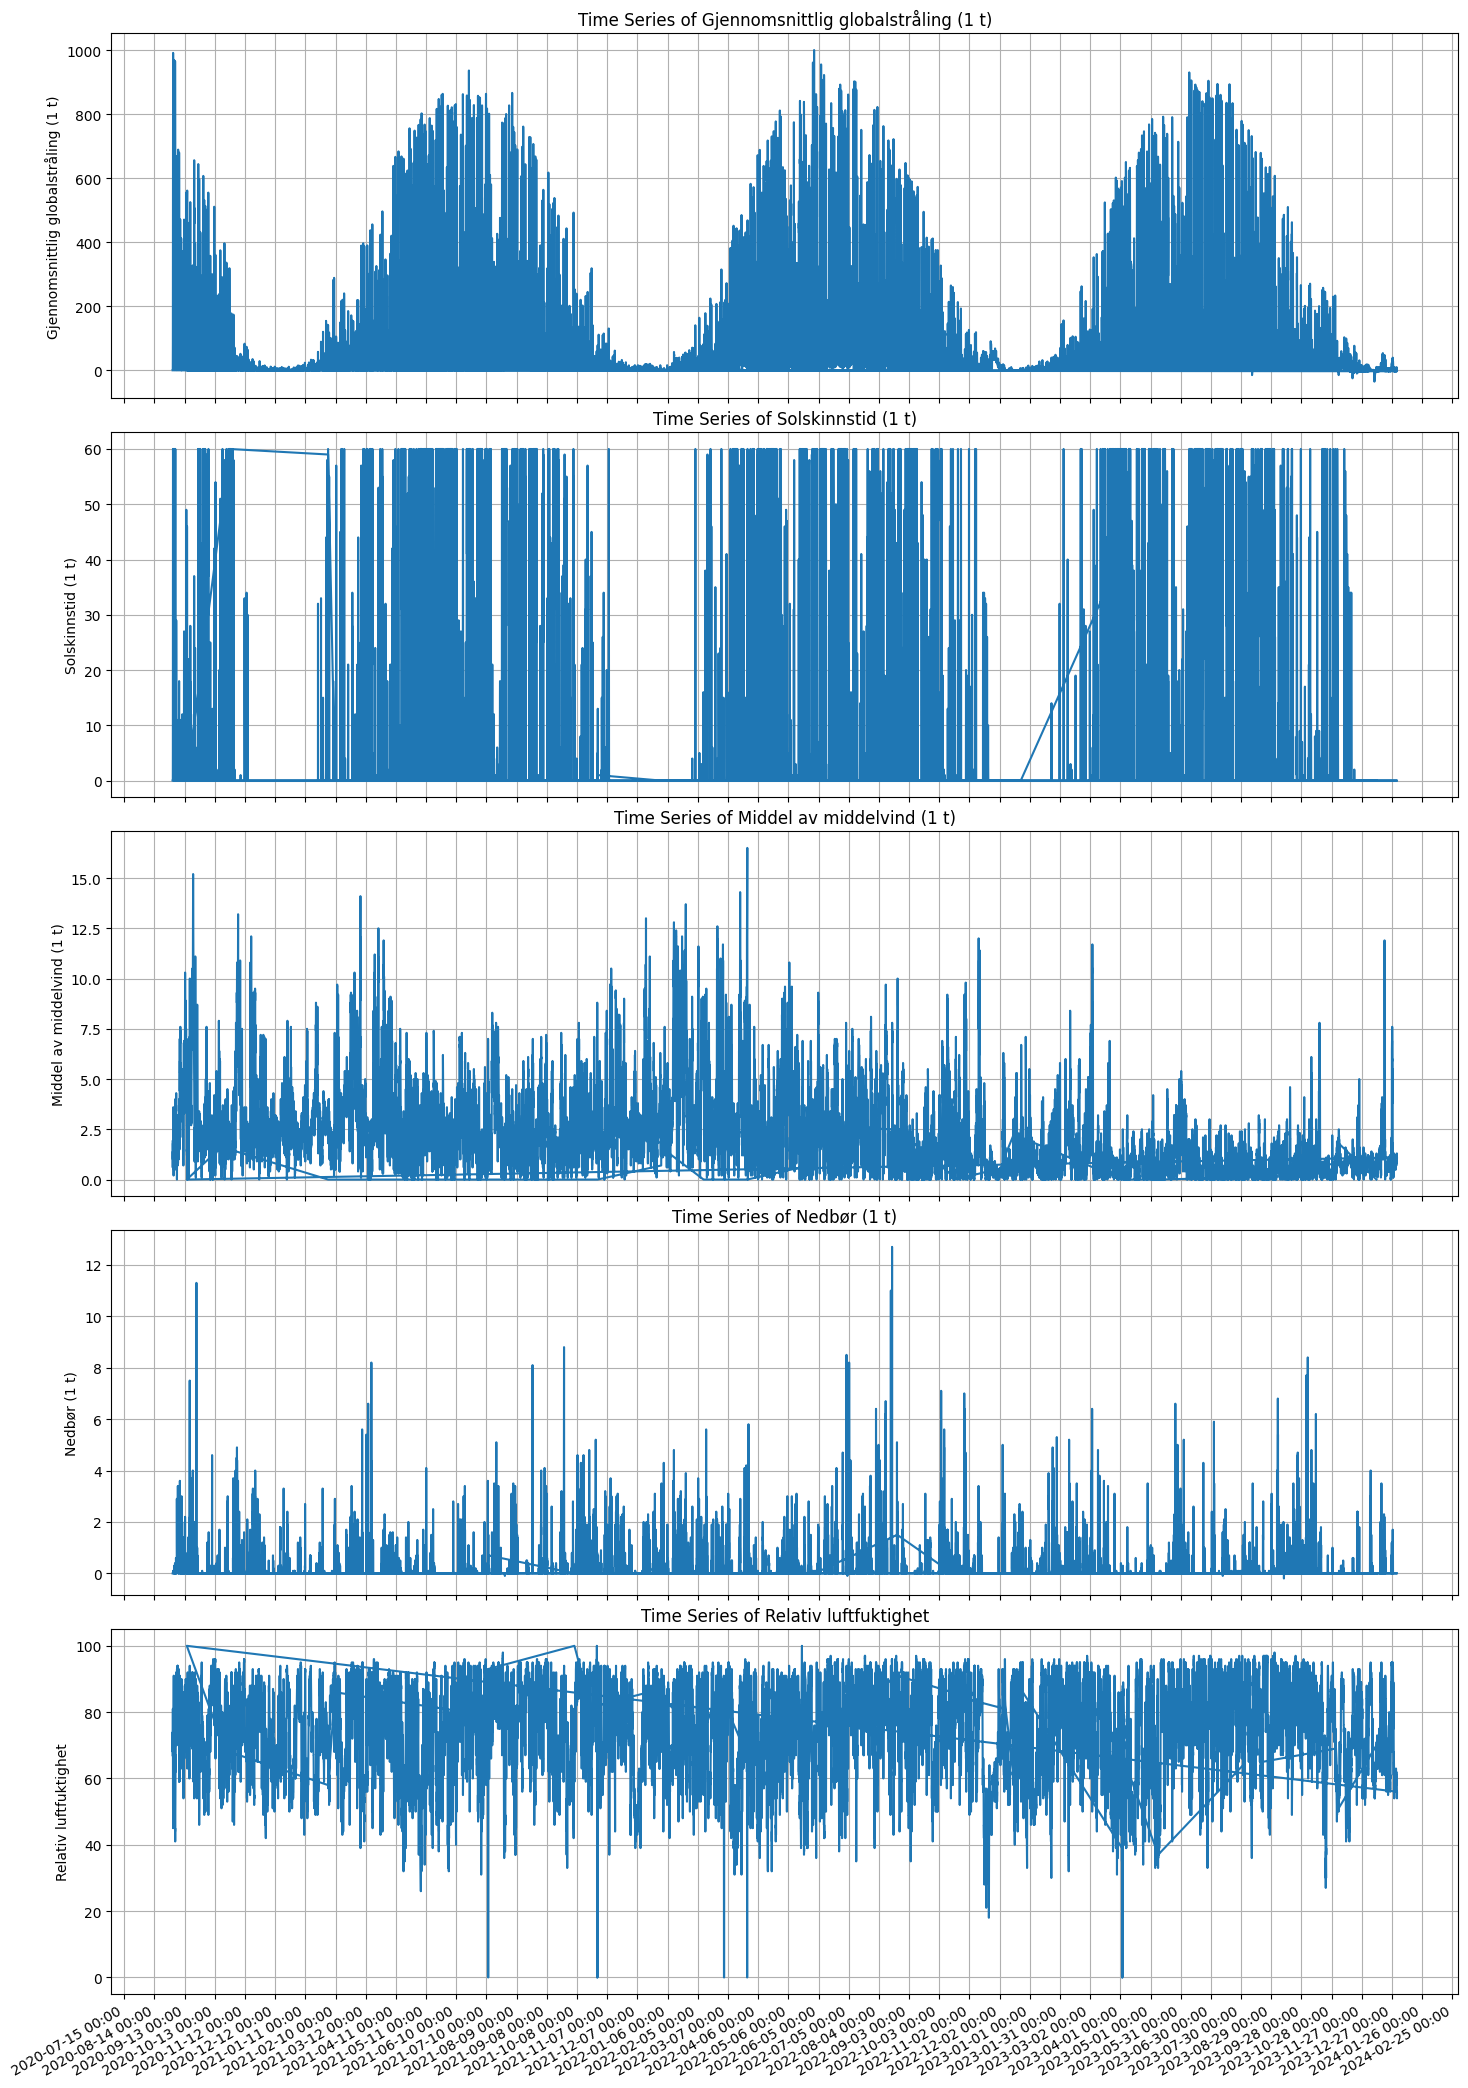

In [15]:


# Path to your Parquet file
parquet_file_path = r'C:\Users\200408\OneDrive - Betonmast\Skrivebord\NTNU\Prosjektoppgave\Klimadata\output_file.parquet'

# Read the Parquet file into a DataFrame
df = pd.read_parquet(parquet_file_path)

# Print the DataFrame to see its contents
print(df)



# Convert 'Tid(norsk normaltid)' to datetime format
df['Tid(norsk normaltid)'] = pd.to_datetime(df['Tid(norsk normaltid)'], format='%Y%m%d%H')

# Set 'Tid(norsk normaltid)' as the index of the DataFrame
df.set_index('Tid(norsk normaltid)', inplace=True)

# Determine the number of subplots needed
num_columns = len(df.columns)
fig, axes = plt.subplots(num_columns, 1, figsize=(15, num_columns * 5), sharex=True)

# Plot each column in a separate subplot
for i, column in enumerate(df.columns):
    axes[i].plot(df.index, df[column], label=column)
    
    # Formatting each subplot
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    axes[i].xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Adjust the interval as needed
    axes[i].set_title(f'Time Series of {column}')
    axes[i].set_ylabel(column)
    axes[i].grid(True)

# Improve spacing between plots
plt.tight_layout()

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Show plot
plt.show()